# ИДЗ №3

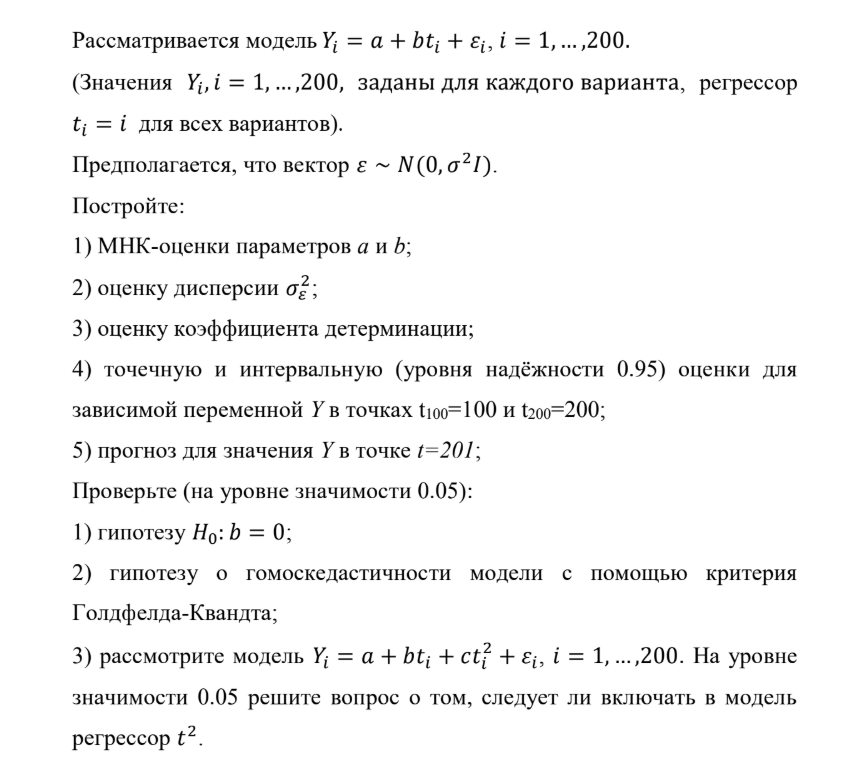

In [ ]:
import numpy as np
import scipy.stats as stats

In [ ]:
# Исходные данные (вариант 28)

Y = np.array([-13.0667,-12.1333,-8.6471,-7.1359,-4.0776,-16.8161,-5.1543,-14.2825,11.5351,-17.9563,-5.7135,
              01.7987,-6.0181,01.7289,02.7943,-1.2107,-3.1772,-5.4659,09.3569,00.6298,12.3369,03.5448,03.8864,
              15.3996,07.8337,06.9629,13.8908,08.8198,26.4772,15.7996,15.9605,18.9269,09.6052,20.8616,16.7275,
              16.9869,31.5768,09.1595,20.9609,26.1633,22.7191,33.8931,18.8032,33.4125,27.7645,28.8530,27.1536,
              30.0192,43.2256,24.2123,40.0690,30.5745,46.9092,41.6747,43.6663,28.4380,41.7710,37.3563,43.7848,
              31.4941,50.7340,48.2195,44.1604,48.8566,47.5476,57.1431,46.6968,50.6780,58.7576,48.1052,53.5027,
              65.1579,41.5648,54.7101,53.9214,51.3056,65.2809,55.7702,63.1030,71.2532,49.7224,76.4692,53.9854,
              77.8248,61.3436,68.9419,66.8446,63.1043,73.0486,74.4035,74.4986,69.2656,77.5857,72.2464,76.2765,
              76.9190,71.5579,86.0379,71.7080,91.3034,74.9482,86.8947,74.5806,102.8354,76.7199,96.4805,77.3467,
              90.9754,74.8570,104.8306,86.1216,92.9822,86.4538,99.1617,93.6631,103.1810,97.7831,99.8512,96.5865,
              99.7693,97.4914,108.0463,87.6793,114.3422,105.2549,96.0047,113.7729,104.2047,107.0850,112.6592,
              104.8050,110.8601,98.8993,111.6054,102.0244,115.5743,110.5507,116.7662,111.3572,108.6798,122.0118,
              109.5247,127.4824,120.3681,120.2627,113.1276,115.9696,129.6752,118.2230,129.2284,119.2042,125.9536,
              134.9612,119.0270,143.4780,123.3894,143.9974,120.9775,138.2909,137.6079,133.4908,124.1937,153.3494,
              129.3653,161.4289,129.4640,153.3313,127.6224,148.2832,144.2044,151.1246,138.0920,161.6436,138.0106,
              150.7584,138.9695,157.8111,149.7734,156.7452,146.9957,156.6645,149.1738,163.0105,152.3838,163.2943,
              160.1688,155.0573,170.7816,152.6533,162.2988,158.8665,164.6226,170.9414,160.1639,171.1954,166.5953,
              171.9394,181.3421,171.4168,163.5300])
t = np.arange(1, 201)
n = len(t)

### 1. МНК-оценки параметров $a$ и $b$:

\begin{aligned}
&\text{Модель: } Y_i = a + b t_i + \varepsilon_i \
&\hat{b} = \frac{\sum_{i=1}^n (t_i - \bar{t})(Y_i - \bar{Y})}{\sum_{i=1}^n (t_i - \bar{t})^2} \
&\hat{a} = \bar{Y} - \hat{b}\bar{t}
\end{aligned}

In [ ]:
# Вычисляем суммы
sum_t = np.sum(t)
sum_Y = np.sum(Y)
sum_tY = np.sum(t * Y)
sum_t2 = np.sum(t**2)

# Расчет коэффициентов
b_hat = (n * sum_tY - sum_t * sum_Y) / (n * sum_t2 - sum_t**2)
a_hat = (sum_Y - b_hat * sum_t) / n

print("МНК-оценки:")
print(f"â = {a_hat:.4f}")
print(f"b̂ = {b_hat:.4f}")

МНК-оценки:
â = -12.9200
b̂ = 0.9256


### 2. Оценка дисперсии $\sigma_\varepsilon^2$:

\begin{aligned}
\hat{\sigma}^2 = \frac{RSS}{n-p-1} = \frac{\sum_{i=1}^n (Y_i - \hat{Y}_i)^2}{n-2}
\end{aligned}

In [ ]:
# Расчет остатков
Y_pred = a_hat + b_hat * t
residuals = Y - Y_pred

# Оценка дисперсии
sigma2_hat = np.sum(residuals**2) / (n - 2)

print("Оценка дисперсии ошибок:")
print(f"σ̂^2 = {sigma2_hat:.4f}")

Оценка дисперсии ошибок:
σ̂^2 = 52.7588


###3. Оценка коэффициента детерминации $R^2$:



\begin{aligned}
R^2 = 1 - \frac{RSS}{TSS} = \frac{ESS}{TSS} = \frac{\sum_{i=1}^n (\hat{Y}i - \bar{Y})^2}{\sum{i=1}^n (Y_i - \bar{Y})^2}
\end{aligned}

In [ ]:
TSS = np.sum((Y - np.mean(Y))**2)
RSS = np.sum(residuals**2)
R2 = 1 - RSS/TSS

print(f"Коэффициент детерминации:")
print(f"R^2 = {R2:.4f}")

Коэффициент детерминации:
R^2 = 0.9820


###4-5. Точечная и интервальная оценки для $Y$:

\begin{aligned}
&\hat{Y}_0 = \hat{a} + \hat{b}t_0 \
&CI = \hat{Y}0 \pm t{1-\alpha/2}^{(n-p)} \cdot \hat{\sigma} \sqrt{\frac{1}{n} + \frac{(t_0 - \bar{t})^2}{\sum (t_i - \bar{t})^2}}
\end{aligned}

In [ ]:
# Для точек t = 100 и t = 200
t_points = [100, 200]
t_mean = np.mean(t)
Sxx = np.sum((t - t_mean)**2)

alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df=n-2)

print("Точечные и интервальные оценки:")
for t0 in t_points:
    Y_pred = a_hat + b_hat * t0
    se = np.sqrt(sigma2_hat * (1/n + (t0 - t_mean)**2 / Sxx))
    ci_lower = Y_pred - t_critical * se
    ci_upper = Y_pred + t_critical * se

    print(f"Для t = {t0}:")
    print(f"  Точечная оценка: {Y_pred:.4f}")
    print(f"ДИ: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Для t = 201 (+ 1 под корень в формуле)
t0 = 201
Y_pred = a_hat + b_hat * t0
se = np.sqrt(sigma2_hat * (1 + 1/n + (t0 - t_mean)**2 / Sxx))
ci_lower = Y_pred - t_critical * se
ci_upper = Y_pred + t_critical * se

print(f"Для t = {t0}:")
print(f"   Предполагаемая точечная оценка: {Y_pred:.4f}")
print(f"ДИ: [{ci_lower:.4f}, {ci_upper:.4f}]")

Точечные и интервальные оценки:
Для t = 100:
  Точечная оценка: 79.6443
ДИ: [78.6314, 80.6572]
Для t = 200:
  Точечная оценка: 172.2086
ДИ: [170.1905, 174.2267]
Для t = 201:
   Предполагаемая точечная оценка: 173.1342
ДИ: [158.6668, 187.6016]


### 6. Проверка гипотезы $H: b = 0$:

\begin{aligned}
t = \frac{\hat{b}}{SE(\hat{b})} \sim t_{n-p-1}
\end{aligned}

In [ ]:
se_b = np.sqrt(sigma2_hat / Sxx)
t_stat = b_hat / se_b
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-2))

print("Проверка гипотезы H: b = 0:")
print(f"t-статистика = {t_stat:.4f}")
# print(f"p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Отвергаем H0: b - значимый коэффициент")
else:
    print("Не отвергаем H0")

Проверка гипотезы H: b = 0:
t-статистика = 104.0507
Отвергаем H0: b - значимый коэффициент


###7. Проверка гомоскедастичности через критерий Голдфелда-Квандта:

\begin{aligned}
GQ = \frac{RSS_2}{RSS_1} \sim F_{n-k-2h, n-k-2h}
\end{aligned}

In [ ]:
sorted_idx = np.argsort(t)
t_sorted = t[sorted_idx]
Y_sorted = Y[sorted_idx]

# Разделяем на 3 группы, центральную не берем
n_group = n // 3
group1 = slice(0, n_group)
group3 = slice(2*n_group+2, None)

# Регрессия для 1-й группы
X1 = np.column_stack([np.ones(n_group), t_sorted[group1]])
beta1 = np.linalg.inv(X1.T @ X1) @ X1.T @ Y_sorted[group1]
resid1 = Y_sorted[group1] - X1 @ beta1
RSS1 = np.sum(resid1**2)

# Регрессия для 3-й группы
X3 = np.column_stack([np.ones(n_group), t_sorted[group3]])
beta3 = np.linalg.inv(X3.T @ X3) @ X3.T @ Y_sorted[group3]
resid3 = Y_sorted[group3] - X3 @ beta3
RSS3 = np.sum(resid3**2)

# Статистика теста
GQ_stat = RSS3 / RSS1
df = n_group - 2
p_value = 2 * min(stats.f.cdf(GQ_stat, df, df), 1 - stats.f.cdf(GQ_stat, df, df))

print("Тест Голдфелд-Квандта:")
print(f"GQ статистика = {GQ_stat:.4f}")
print(f"p-value = {p_value:.6f}")
if p_value < 0.05:
    print("Отвергаем гипотезу о гомоскедастичности")
else:
    print("Не отвергаем гипотезу о гомоскедастичности")

Тест Голдфелд-Квандта:
GQ статистика = 1.6017
p-value = 0.061693
Не отвергаем гипотезу о гомоскедастичности


###8. Проверка включения квадратичного регрессора $t^2$:

\begin{aligned}
Y_i = a + b t_i + c t_i^2 + \varepsilon_i \
H_0: c = 0 \quad \text{(проверяем t-тестом)}
\end{aligned}

In [ ]:
import numpy as np

# Добавляем квадратичный член
t_sq = t**2

# Строим матрицу плана
X_quad = np.column_stack([np.ones(n), t, t_sq])

beta_quad = np.linalg.inv(X_quad.T @ X_quad) @ X_quad.T @ Y
a_quad, b_quad, c_quad = beta_quad

residuals_quad = Y - X_quad @ beta_quad
sigma2_quad = np.sum(residuals_quad**2) / (n - 3)
cov_matrix = sigma2_quad * np.linalg.inv(X_quad.T @ X_quad)
se_c = np.sqrt(cov_matrix[2, 2])

# t-тест для коэффициента c
t_stat_quad = c_quad / se_c
p_value_quad = 2 * (1 - stats.t.cdf(abs(t_stat_quad), df=n-3))

print("\nПроверка квадратичного члена (t-тест):")
print(f"Оценка коэффициента при t^2: {c_quad:.6f}")
print(f"Стандартная ошибка: {se_c:.6f}")
print(f"t-статистика: {t_stat_quad:.4f}")
print(f"p-value: {p_value_quad:.6f}")

if p_value_quad < 0.05:
    print("Вывод: отвергаем H0, квадратичный член значим")
else:
    print("Вывод: не отвергаем H0, квадратичный член незначим")



Проверка квадратичного члена (t-тест):
Оценка коэффициента при t^2: -0.000161
Стандартная ошибка: 0.000172
t-статистика: -0.9314
p-value: 0.352798
Вывод: не отвергаем H0, квадратичный член незначим


###9. Бонус за просрочку дедлайна

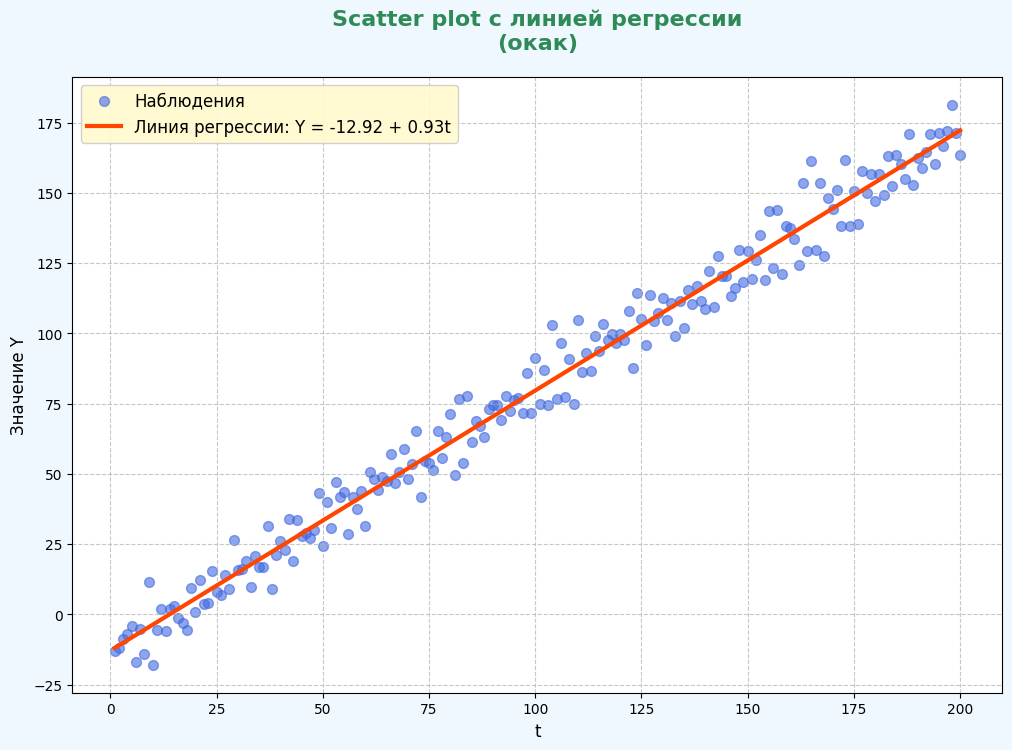

In [ ]:
import matplotlib.pyplot as plt

Y = np.array([-13.0667,-12.1333,-8.6471,-7.1359,-4.0776,-16.8161,-5.1543,-14.2825,11.5351,-17.9563,-5.7135,
              01.7987,-6.0181,01.7289,02.7943,-1.2107,-3.1772,-5.4659,09.3569,00.6298,12.3369,03.5448,03.8864,
              15.3996,07.8337,06.9629,13.8908,08.8198,26.4772,15.7996,15.9605,18.9269,09.6052,20.8616,16.7275,
              16.9869,31.5768,09.1595,20.9609,26.1633,22.7191,33.8931,18.8032,33.4125,27.7645,28.8530,27.1536,
              30.0192,43.2256,24.2123,40.0690,30.5745,46.9092,41.6747,43.6663,28.4380,41.7710,37.3563,43.7848,
              31.4941,50.7340,48.2195,44.1604,48.8566,47.5476,57.1431,46.6968,50.6780,58.7576,48.1052,53.5027,
              65.1579,41.5648,54.7101,53.9214,51.3056,65.2809,55.7702,63.1030,71.2532,49.7224,76.4692,53.9854,
              77.8248,61.3436,68.9419,66.8446,63.1043,73.0486,74.4035,74.4986,69.2656,77.5857,72.2464,76.2765,
              76.9190,71.5579,86.0379,71.7080,91.3034,74.9482,86.8947,74.5806,102.8354,76.7199,96.4805,77.3467,
              90.9754,74.8570,104.8306,86.1216,92.9822,86.4538,99.1617,93.6631,103.1810,97.7831,99.8512,96.5865,
              99.7693,97.4914,108.0463,87.6793,114.3422,105.2549,96.0047,113.7729,104.2047,107.0850,112.6592,
              104.8050,110.8601,98.8993,111.6054,102.0244,115.5743,110.5507,116.7662,111.3572,108.6798,122.0118,
              109.5247,127.4824,120.3681,120.2627,113.1276,115.9696,129.6752,118.2230,129.2284,119.2042,125.9536,
              134.9612,119.0270,143.4780,123.3894,143.9974,120.9775,138.2909,137.6079,133.4908,124.1937,153.3494,
              129.3653,161.4289,129.4640,153.3313,127.6224,148.2832,144.2044,151.1246,138.0920,161.6436,138.0106,
              150.7584,138.9695,157.8111,149.7734,156.7452,146.9957,156.6645,149.1738,163.0105,152.3838,163.2943,
              160.1688,155.0573,170.7816,152.6533,162.2988,158.8665,164.6226,170.9414,160.1639,171.1954,166.5953,
              171.9394,181.3421,171.4168,163.5300])
t = np.arange(1, 201)

plt.figure(figsize=(12, 8), facecolor='#f0f8ff')
plt.scatter(t, Y, color='#4169e1', alpha=0.6, label="Наблюдения", marker='o', s=50)
Y_pred = a_hat + b_hat*t
plt.plot(t, Y_pred, color='#ff4500', linewidth=3, label=f"Линия регрессии: Y = {a_hat:.2f} + {b_hat:.2f}t")

plt.title("Scatter plot с линией регрессии\n(окак)",
          fontsize=16, pad=20, color='#2e8b57', fontweight='bold')
plt.xlabel("t", fontsize=12)
plt.ylabel("Значение Y", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, framealpha=0.9, facecolor='#fffacd')
